In [1]:
# initialization for my classroom
import os
from datetime import datetime as dt

def logfile(user=os.environ.get('JUPYTERHUB_USER') or 'jovyan'):
    prefix='/srv'
    if os.path.isdir(prefix) and os.access(prefix, os.W_OK):
        prefix+=('/'+user)
        if not os.path.isdir(prefix):
            os.makedirs(prefix)
    else:
        prefix='.'
    return prefix+'/'+dt.now().strftime('%Y%m%d')+'.log'

path=logfile()
#%logstop
%logstart -otq $path append

# [python - cannot override sys.excepthook - Stack Overflow](https://stackoverflow.com/questions/1261668/cannot-override-sys-excepthook/28758396)
# https://github.com/ipython/ipython/blob/e6432249582e05f438303ce73d082a0351bb383e/IPython/core/interactiveshell.py#L1952

import sys
import traceback
import IPython

try:
    _showtraceback
except NameError:
    _showtraceback=IPython.core.interactiveshell.InteractiveShell.showtraceback

try:
    _showsyntaxerror
except NameError:
    _showsyntaxerror=IPython.core.interactiveshell.InteractiveShell.showsyntaxerror

import logging
logging.basicConfig(filename=path.replace('.log','-exc.log'), format='%(asctime)s %(message)s', level=logging.ERROR, force=True)

import sys
import traceback
import IPython

def showtraceback(self, *args, **kwargs):
    etype, value, tb = self._get_exc_info(kwargs.get('exc_tuple'))
    stb = self.InteractiveTB.structured_traceback(
        etype, value, tb, tb_offset=kwargs.get('tb_offset'))
    logging.error(os.environ.get('JUPYTERHUB_USER') or 'jovyan')
    logging.error(self.InteractiveTB.stb2text(stb))
    _showtraceback(self, *args, **kwargs)

def showsyntaxerror(self, *args, **kwargs):
    etype, value, last_traceback = self._get_exc_info()
    elist = traceback.extract_tb(last_traceback) if kwargs.get('running_compiled_code') else []
    stb = self.SyntaxTB.structured_traceback(etype, value, elist)
    logging.error(os.environ.get('JUPYTERHUB_USER') or 'jovyan')
    logging.error(self.InteractiveTB.stb2text(stb))
    _showsyntaxerror(self, *args, **kwargs)

IPython.core.interactiveshell.InteractiveShell.showtraceback = showtraceback
IPython.core.interactiveshell.InteractiveShell.showsyntaxerror = showsyntaxerror

# Napier's Logarithms: 九九のない世界

* [John Napier - Wikipedia](https://en.wikipedia.org/wiki/John_Napier)
  * [Napierian logarithm - Wikipedia](https://en.wikipedia.org/wiki/Napierian_logarithm#:~:text=The%20term%20Napierian%20logarithm%20or,it%20is%20named%20after%20him.)
  * [Logarithms: The Early History of a Familiar Function - John Napier Introduces Logarithms | Mathematical Association of America](https://www.maa.org/press/periodicals/convergence/logarithms-the-early-history-of-a-familiar-function-john-napier-introduces-logarithms)

## Napierの対数表を作る

$$
  \frac{N}{10^R} = \left(1-\frac{1}{10^{R}}\right)^{L}
$$

$$
  L = log_{1-10^{-R}} \frac{N}{10^R} = \frac{\log_{e}\frac{N}{10^R}}{\log_{e}(1-10^{-R})} \approx -10^R \log_{e}\frac{N}{10^R}
$$

$R=7$ の場合の数表を作成した。

In [3]:
from astropy.coordinates import Angle
from astropy import units

In [4]:
Angle('{:d}°{:d}′{:d}″'.format(1,2,3)).radian

0.018049613347708025

In [17]:
import math
import numpy as np
#from scoping import scoping
import pandas as pd

In [59]:
def napier(dms_d=0, r=7):
    for dms_m in range(60):
        a = Angle('{:d}°{:d}′{:d}″'.format(dms_d,dms_m,0))
        yield (a,
               "{:8.0f}".format(math.sin(a.radian)*10**r),
               "{:8.0f}".format(math.log(math.sin(a.radian), 1-1/(10**r)) if a.radian else float('inf')),
               "{:8.0f}".format(math.log(math.tan(a.radian), 1-1/(10**r)) if a.radian else float('inf')),
               "{:8.0f}".format(math.log(math.cos(a.radian), 1-1/(10**r))),
               "{:8.0f}".format(math.cos(a.radian)*10**r),
               Angle('{:d}°{:d}′{:d}″'.format(90,0,0))-Angle('{:d}°{:d}′{:d}″'.format(dms_d,dms_m,0)))

In [67]:
pd.DataFrame(napier(dms_d=0), columns=['d','sin','log(sin(d))','log(tan(d))','log(cos(d))', 'cos(d)', '90-d'])

,d,sin,log(sin(d)),log(tan(d)),log(cos(d)),cos(d),90-d
0,0d00m00s,0,inf,inf,-0,10000000,90d00m00s
1,0d01m00s,2909,81425711,81425711,0,10000000,89d59m00s
2,0d02m00s,5818,74494240,74494239,2,9999998,89d58m00s
3,0d03m00s,8727,70439590,70439586,4,9999996,89d57m00s
4,0d04m00s,11636,67562771,67562764,7,9999993,89d56m00s
5,0d05m00s,14544,65331336,65331326,11,9999989,89d55m00s
6,0d06m00s,17453,63508123,63508107,15,9999985,89d54m00s
7,0d07m00s,20362,61966618,61966597,21,9999979,89d53m00s
8,0d08m00s,23271,60631306,60631279,27,9999973,89d52m00s
9,0d09m00s,26180,59453478,59453444,34,9999966,89d51m00s


## Napierの対数を計算する

$$
  \frac{N}{10^R} = \left(1-\frac{1}{10^{R}}\right)^{L}
$$

$$
  L = log_{1-10^{-R}} \frac{N}{10^R} = \frac{\log_{e}\frac{N}{10^R}}{\log_{e}(1-10^{-R})} \approx -10^R \log_{e}\frac{N}{10^R}
$$

$R=7$ の場合の数表を作成した。

---

$p_{n}$ を次の数列として定義したとき、

$$
  p_{n+1} = p_{n} \left(1-\frac{1}{10^7}\right) = p_{n} \times 0.9999999 \quad \text{where}\ p_{0} = 10^7
$$

$$p_{1} = 10^7 \left(1-\frac{1}{10^7} \right)= 10^7 \times 0.9999999 = 9999999$$

数列の添字 $n$ が $p_{n}$ のNapier対数である:

$$
  n = \log_{1-10^{-7}}\left(\frac{p_{n}}{10^7}\right)
$$

Naperはこの数列を延々と技巧を凝らして計算した。

---

単純に計算すると膨大な計算量となるため、まず $R=5$ の場合を計算する。

$$
  p_{n+1} = p_{n} \left(1-\frac{1}{10^5}\right) = p_{n} \times 0.99999\quad \text{where}\ p_{0} = 10^5
$$

$$p_{1} = 10^5 \left(1-\frac{1}{10^5} \right)= 10^5 \times 0.99999 = 99999$$

底の変換式によって、$R=7$ の場合を効率よく近似できるため、計算は無駄にならない:

$$
  \log_{1-10^{-5}} \frac{N}{10^5} = \frac{\log_{1-10^{-7}}\frac{N}{10^5}}{\log_{1-10^{-7}}(1-10^{-5})} \approx \frac{1}{100}\log_{1-10^{-7}}\frac{N}{10^5} = \frac{1}{100} L(N \times 100)
$$

In [122]:
math.log(1-10**-5, 1-10**-7)

100.00049505548901

関数を繰り返し適用する (数列の値を次々に求める) Python関数を定義する:

In [126]:
def nest_list(f, x, c=1):
    while True:
        yield x
        x = f(x)
        if x < c:
            break
    yield x

In [174]:
10**5, 1-10**(-5)

(100000, 0.99999)

In [168]:
nest_list(lambda l: l*(1-10**(-5)), 10**5, 1)

<generator object nest_list at 0x120242900>

In [159]:
n = nest_list(lambda l: l*(1-10**(-5)), 10**5, 1)
for _ in range(10):
    print(next(n))

100000
99999.0
99998.00001
99997.00002999991
99996.00005999961
99995.00009999902
99994.00014999801
99993.00020999652
99992.00027999442
99991.00035999162


In [161]:
n = nest_list(lambda l: l*(1-10**(-5)), 10**5, 1)
for _ in range(10):
    print('{:5.0f}'.format(next(n)))

100000
99999
99998
99997
99996
99995
99994
99993
99992
99991


終了条件を定義しているので無限列にはならない:
```python
        if x < c:
            break
```

In [170]:
napier5=np.array(list(nest_list(lambda l: l*(1-10**(-5)), 10**5, 1)))

In [171]:
napier5.size, napier5[-1]

(1151288, 0.9999979002909413)

In [173]:
napier5[0:100]

array([100000.        ,  99999.        ,  99998.00001   ,  99997.00003   ,
        99996.00006   ,  99995.0001    ,  99994.00015   ,  99993.00021   ,
        99992.00027999,  99991.00035999,  99990.00044999,  99989.00054998,
        99988.00065998,  99987.00077997,  99986.00090996,  99985.00104995,
        99984.00119994,  99983.00135993,  99982.00152992,  99981.0017099 ,
        99980.00189989,  99979.00209987,  99978.00230985,  99977.00252982,
        99976.0027598 ,  99975.00299977,  99974.00324974,  99973.00350971,
        99972.00377967,  99971.00405963,  99970.00434959,  99969.00464955,
        99968.0049595 ,  99967.00527945,  99966.0056094 ,  99965.00594935,
        99964.00629929,  99963.00665922,  99962.00702916,  99961.00740909,
        99960.00779901,  99959.00819893,  99958.00860885,  99957.00902877,
        99956.00945868,  99955.00989858,  99954.01034848,  99953.01080838,
        99952.01127827,  99951.01175816,  99950.01224804,  99949.01274792,
        99948.01325779,  

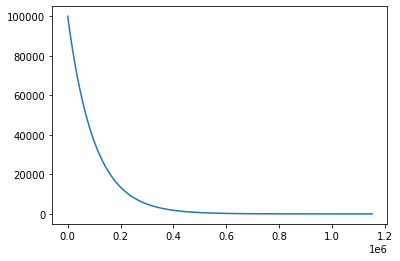

In [129]:
import matplotlib.pyplot as plt

x = np.linspace(0,napier5.size,num=napier5.size)
plt.plot(x,napier5)